In [1]:
import stream2 as st2

Read data

In [2]:
adata = st2.read_h5ad('data/stream_layers_jon_promoter.h5ad')

Seed graph

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


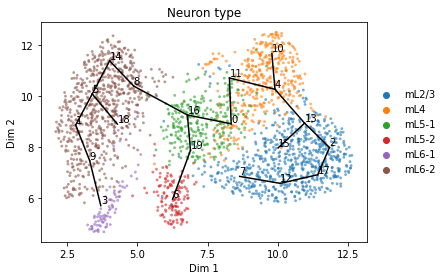

In [3]:
st2.tl.seed_graph(adata,n_clusters=20)
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'],key='seed_epg')

The seeded graph does not follow the path we want so we supervise graph initialization with labels and paths to favor or disfavor (paths, paths_forbidden) with a given strength (label_strength)

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


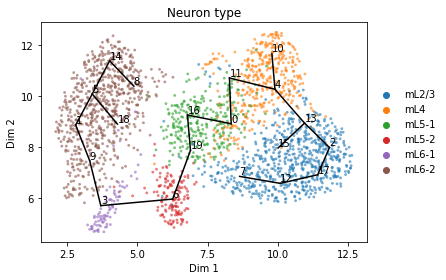

In [4]:
st2.tl.seed_graph(adata,n_clusters=20,
                  label='Neuron type',
                  label_strength=.5,
                  paths=[['mL5-2','mL6-1']],
                  paths_forbidden=[['mL5-1','mL6-2']],
                 )
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'],key='seed_epg')

We now refine the seed graph and turn it into a principal graph

In [5]:
st2.tl.learn_graph(adata,use_seed=True,verbose=True)

Constructing tree 1 of 1 / Subset 1 of 1
Computing EPG with  50  nodes on  2278  points and  2  dimensions

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||21	0.9222	21	20	15	2	0	0	0.6046	0.5303	0.9504	0.9565	0.2148	0.1028	2.1588	45.3357	0
1||22	0.8657	22	21	18	1	0	0	0.5973	0.53	0.951	0.9565	0.1968	0.0716	1.5755	34.6611	0
1||23	0.8303	23	22	19	1	0	0	0.5747	0.5131	0.9528	0.9579	0.1923	0.0632	1.4544	33.4519	0
1||24	0.8204	24	23	20	1	0	0	0.569	0.5097	0.9533	0.9582	0.1879	0.0635	1.5244	36.5848	0
1||25	0.796	25	24	21	1	0	0	0.5561	0.5001	0.9544	0.9589	0.1831	0.0569	1.4213	35.5335	0
1||26	0.7648	26	25	22	1	0	0	0.5321	0.4791	0.9563	0.9607	0.1832	0.0495	1.2868	33.4574	0
1||27	0.7577	27	26	23	1	0	0	0.5329	0.4865	0.9563	0.9601	0.1734	0.0513	1.3862	37.4263	0
1||28	0.7415	28	27	24	1	0	0	0.5196	0.4744	0.9573	0.9611	0.1729	0.049	1.3708	38.3813	0
1||29	0.731	29	28	25	1	0	0	0.5128	0.4687	0.9579	0.9615	0.1698	0.0484	1.4049	40.7429	0
1||30	0.7146	30	29	26	

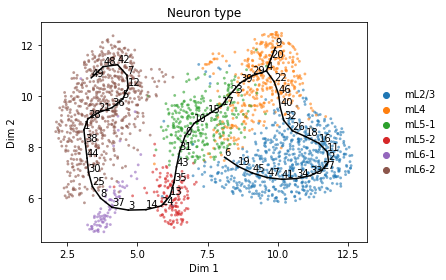

In [6]:
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'])

We further fine-tune the graph by deleting the path between node 4 and 9

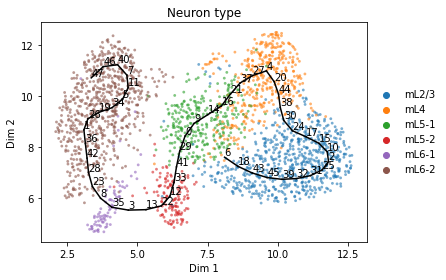

In [7]:
st2.tl.del_path(adata,4,9)
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'])

We further fine-tune the graph by adding a path between node 6 and 14

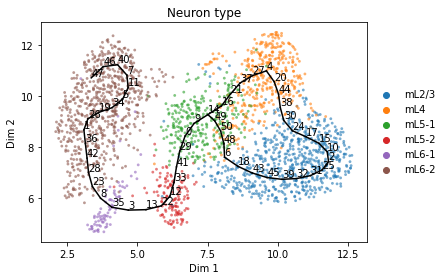

In [8]:
st2.tl.add_path(adata,6,14,n_nodes=5)
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'])

We now compute the pseudotime given a root node

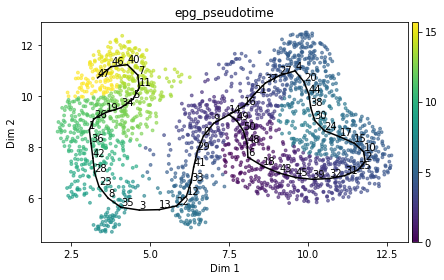

In [9]:
st2.tl.infer_pseudotime(adata,source=6,key='epg')
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['epg_pseudotime'])

We can also compute the pseudotime for a given path and specify nodes to include in the path

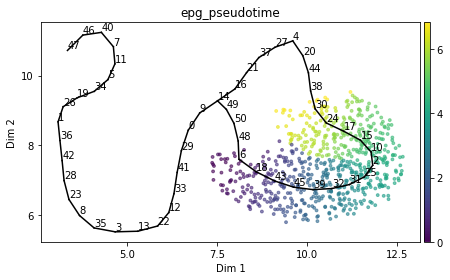

In [10]:
st2.tl.infer_pseudotime(adata,source=6,target=30,key='epg')
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['epg_pseudotime'])

If we wanted to compute pseudotime for the path from above instead, we can specify nodes to include in the path

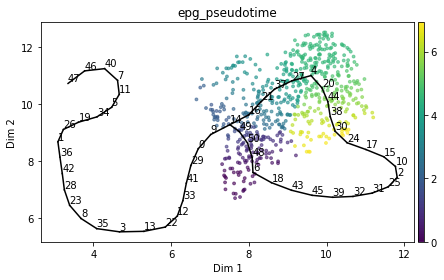

In [11]:
st2.tl.infer_pseudotime(adata,source=6,target=30,nodes_to_include=[50],key='epg')
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['epg_pseudotime'])

Finally we can detect transition markers for any given path between two nodes

In [12]:
adata.uns['workdir']=''

In [13]:
st2.tl.detect_transition_markers(adata,
                                 source=6,
                                 target=30,
                                 nodes_to_include=[50],
                                 method='spearman'
                                )

Filtering out markers that are expressed in less than 5 cells ...
10 markers are being scanned ...
No Transition markers are detected in branch with nodes 6 to 30


/mnt/c/Users/jobac/Desktop/all/git/STREAM2/stream2/tools/_markers.py:211: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_pos_scaled = df_pos / maxValues[:, None].T


Instead of speraman correlation we can also use xi correlation to detect arbitrary non-linear relationships
along the path

In [14]:
st2.tl.detect_transition_markers(adata,
                                 source=6,
                                 target=30,
                                 nodes_to_include=[50],
                                 method='xi',
                                )

Filtering out markers that are expressed in less than 5 cells ...


/mnt/c/Users/jobac/Desktop/all/git/STREAM2/stream2/tools/_markers.py:211: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_pos_scaled = df_pos / maxValues[:, None].T


10 markers are being scanned ...
No Transition markers are detected in branch with nodes 6 to 30
